<a href="https://colab.research.google.com/github/namphuong20146470/namphuong20146470/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)
X=X_test

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


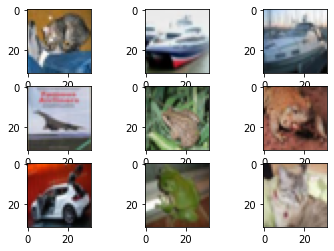

In [ ]:
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(X[i])
plt.show()

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train,y_train, epochs=20, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/20
1250/1250 - 8s - loss: 1.4216 - accuracy: 0.4905 - val_loss: 1.5221 - val_accuracy: 0.4572 - 8s/epoch - 7ms/step
Epoch 2/20
1250/1250 - 8s - loss: 1.4025 - accuracy: 0.4960 - val_loss: 1.5379 - val_accuracy: 0.4628 - 8s/epoch - 7ms/step
Epoch 3/20
1250/1250 - 8s - loss: 1.3897 - accuracy: 0.5035 - val_loss: 1.5247 - val_accuracy: 0.4599 - 8s/epoch - 7ms/step
Epoch 4/20
1250/1250 - 9s - loss: 1.3766 - accuracy: 0.5080 - val_loss: 1.6078 - val_accuracy: 0.4466 - 9s/epoch - 7ms/step
Epoch 5/20
1250/1250 - 9s - loss: 1.3594 - accuracy: 0.5110 - val_loss: 1.5262 - val_accuracy: 0.4671 - 9s/epoch - 7ms/step
Epoch 6/20
1250/1250 - 8s - loss: 1.3453 - accuracy: 0.5158 - val_loss: 1.4747 - val_accuracy: 0.4840 - 8s/epoch - 7ms/step
Epoch 7/20
1250/1250 - 8s - loss: 1.3315 - accuracy: 0.5228 - val_loss: 1.5097 - val_accuracy: 0.4722 - 8s/epoch - 7ms/step
Epoch 8/20
1250/1250 - 9s - loss: 1.3164 - accuracy: 0.5282 - val_loss: 1.5624 - val_accuracy: 0.4677 - 9s/epoch - 7ms/step
Epoch 9/

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss =', score[0])
print('Test accurracy =', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.5336 - accuracy: 0.4850
Test loss = 1.5335850715637207
Test accurracy = 0.48500001430511475


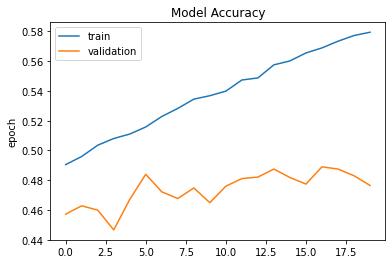

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','validation'],loc='upper left')

[1.3709605e-03 5.2871672e-04 5.6223933e-02 3.7107843e-01 1.4667030e-01
 4.0818268e-01 1.4657574e-02 2.7099921e-04 8.6130603e-04 1.5505475e-04]


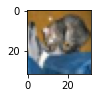

[1.5856365e-02 7.7110536e-02 9.4173025e-05 1.1269310e-05 1.7672891e-06
 2.6794987e-05 2.0842649e-06 6.6702138e-04 8.8247615e-01 2.3753924e-02]


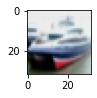

[1.0472642e-01 1.0578028e-02 1.5920205e-03 3.0587657e-04 6.7552197e-04
 4.1518733e-04 2.9828616e-05 8.7680423e-04 8.5228014e-01 2.8520174e-02]


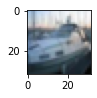

[4.6131149e-01 4.4881296e-03 5.8642812e-02 1.4629178e-03 3.0435136e-01
 6.5530167e-04 2.7783719e-05 2.5502123e-02 1.3634339e-01 7.2146975e-03]


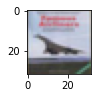

[1.33930275e-03 1.10951905e-05 3.72016132e-02 9.37814452e-03
 3.89279962e-01 8.83383304e-03 5.53040743e-01 8.17580149e-04
 6.48195055e-05 3.28416609e-05]


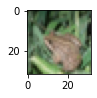

[2.6928322e-04 2.9368143e-04 2.1423869e-02 7.0902312e-01 1.8775148e-02
 4.0299658e-02 2.0274322e-01 7.1652411e-03 4.6799937e-06 1.9582674e-06]


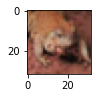

[2.7864119e-03 7.0922577e-01 1.3494739e-04 2.5971612e-01 4.5158731e-06
 2.5431070e-02 2.4675438e-03 2.1638282e-04 7.1038558e-06 1.0237380e-05]


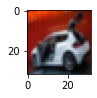

[7.04763865e-04 4.79416735e-03 1.15780495e-02 5.20012015e-03
 1.06185128e-03 5.49872871e-04 8.31989467e-01 2.50735775e-05
 4.24115715e-04 1.43672481e-01]


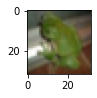

[1.7711060e-03 9.6927717e-05 1.5872191e-01 1.0203306e-01 2.3545110e-01
 2.7539200e-01 4.9470202e-03 2.2043318e-01 4.8888841e-04 6.6481082e-04]


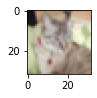

In [ ]:
y_pred = model.predict(X_test)
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(X[i])
  print(y_pred[i])
  plt.show()